# Supercharge Selenium `WebDriver` with Manen `Browser`

To counter the lack of operability and interactivity in Selenium WebDriver, Manen implements a supercharged version of it, called `Browser`. This browser inherits from the WebDriver, meaning that everything you can do with a browser, you can do it with an instance of `WebDriver`.

This guide will show you how to use the `Browser` class and its methods.

Note that, for now, only Chrome browser is supported. Other browsers will be supported in the future.

## Browser initialization

The `Browser` class provide a method to easily initialize it, with some shortcuts for popular options (such as driver path, headless mode, proxy, window size). If you don't have any webdriver installed, you can use the Selenium manager (only available in Selenium 4) to automatically download it.

In [1]:
from selenium.webdriver.common.selenium_manager import SeleniumManager

selenium_manager = SeleniumManager()
paths = selenium_manager.binary_paths(['--browser', 'chrome'])

In [2]:
from manen.browser import ChromeBrowser, HeadlessMode

browser = ChromeBrowser.initialize(
    driver_path=paths['driver_path'],
    headless_mode=HeadlessMode.NEW,
    window_size=(1152, 864),
)

Given that a browser class just inherits from a `WebDriver`, all the usual methods such as `get`, `save_screenshot`, `find_element(s)` are available.

In [3]:
browser.get("https://kodaho.github.io/manen")

In [4]:
from selenium.webdriver.common.by import By

for elt in browser.find_elements(By.CSS_SELECTOR, "div.sidebar-tree>ul>li.toctree-l1>a"):
    print(f"{elt.get_attribute('innerText'):25} -> {elt.get_property('href')}")

About the project         -> https://kodaho.github.io/manen/about.html
Installation              -> https://kodaho.github.io/manen/installation.html
User Guide                -> https://kodaho.github.io/manen/user_guide.html
Going deeper into Manen   -> https://kodaho.github.io/manen/manen/manen.html
Contributing              -> https://kodaho.github.io/manen/contributing.html
Changelog                 -> https://kodaho.github.io/manen/changelog.html


## Interacting with the DOM

Let's explore the search results for "selenium" in PyPI.

In [5]:
browser.get("https://pypi.org/search/?q=selenium")

For consistency in our result, we will use the english version. To click on the button allowing to change the language, we will use `click_with_js` given that the element may not be visible.

In [6]:
button_en_switcher = browser.find('xpath://button[@value="en"]', many=False)
browser.click_with_js(button_en_switcher)

In [7]:
button_close_notification = browser.find('css:div.notification-bar  button.notification-bar__dismiss', many=False)
browser.click_with_js(button_close_notification)

One of the methods included in the browser is based on the `find()` function defined in `manen.finder`. With the method, `browser.find(...)`, you get an improved way to retrieve elements from the DOM. See the user guide about DOM exploration to get the full list of features provided by this function.

In [8]:
# Find all the name of the package in the search results
elements = browser.find(
    selector="ul[aria-label='Search results']>li>a>h3>span.package-snippet__name",
    many=True,
    wait=3,
)
for element in elements[:5]:
    print(element.get_attribute('innerText'))

selenium
selenium2
percy-selenium
play-selenium
pytest-selenium


Similarly, the `lookup` method provides a way to get an element, but will never raises an error if this element is not found (the default value returned if not found is `None`, but it can be changed). Note that this is the same as calling `browser.find(..., default=None)`.

In [9]:
browser.lookup('css:i-dont-exist')

During the development of your project or in production for debug purposes, it can be great to know what match with your selectors. Manen browser provide a method `highlight` for this purpose. This method will locate elements using the `find` method, and then draw a frame around each found element.

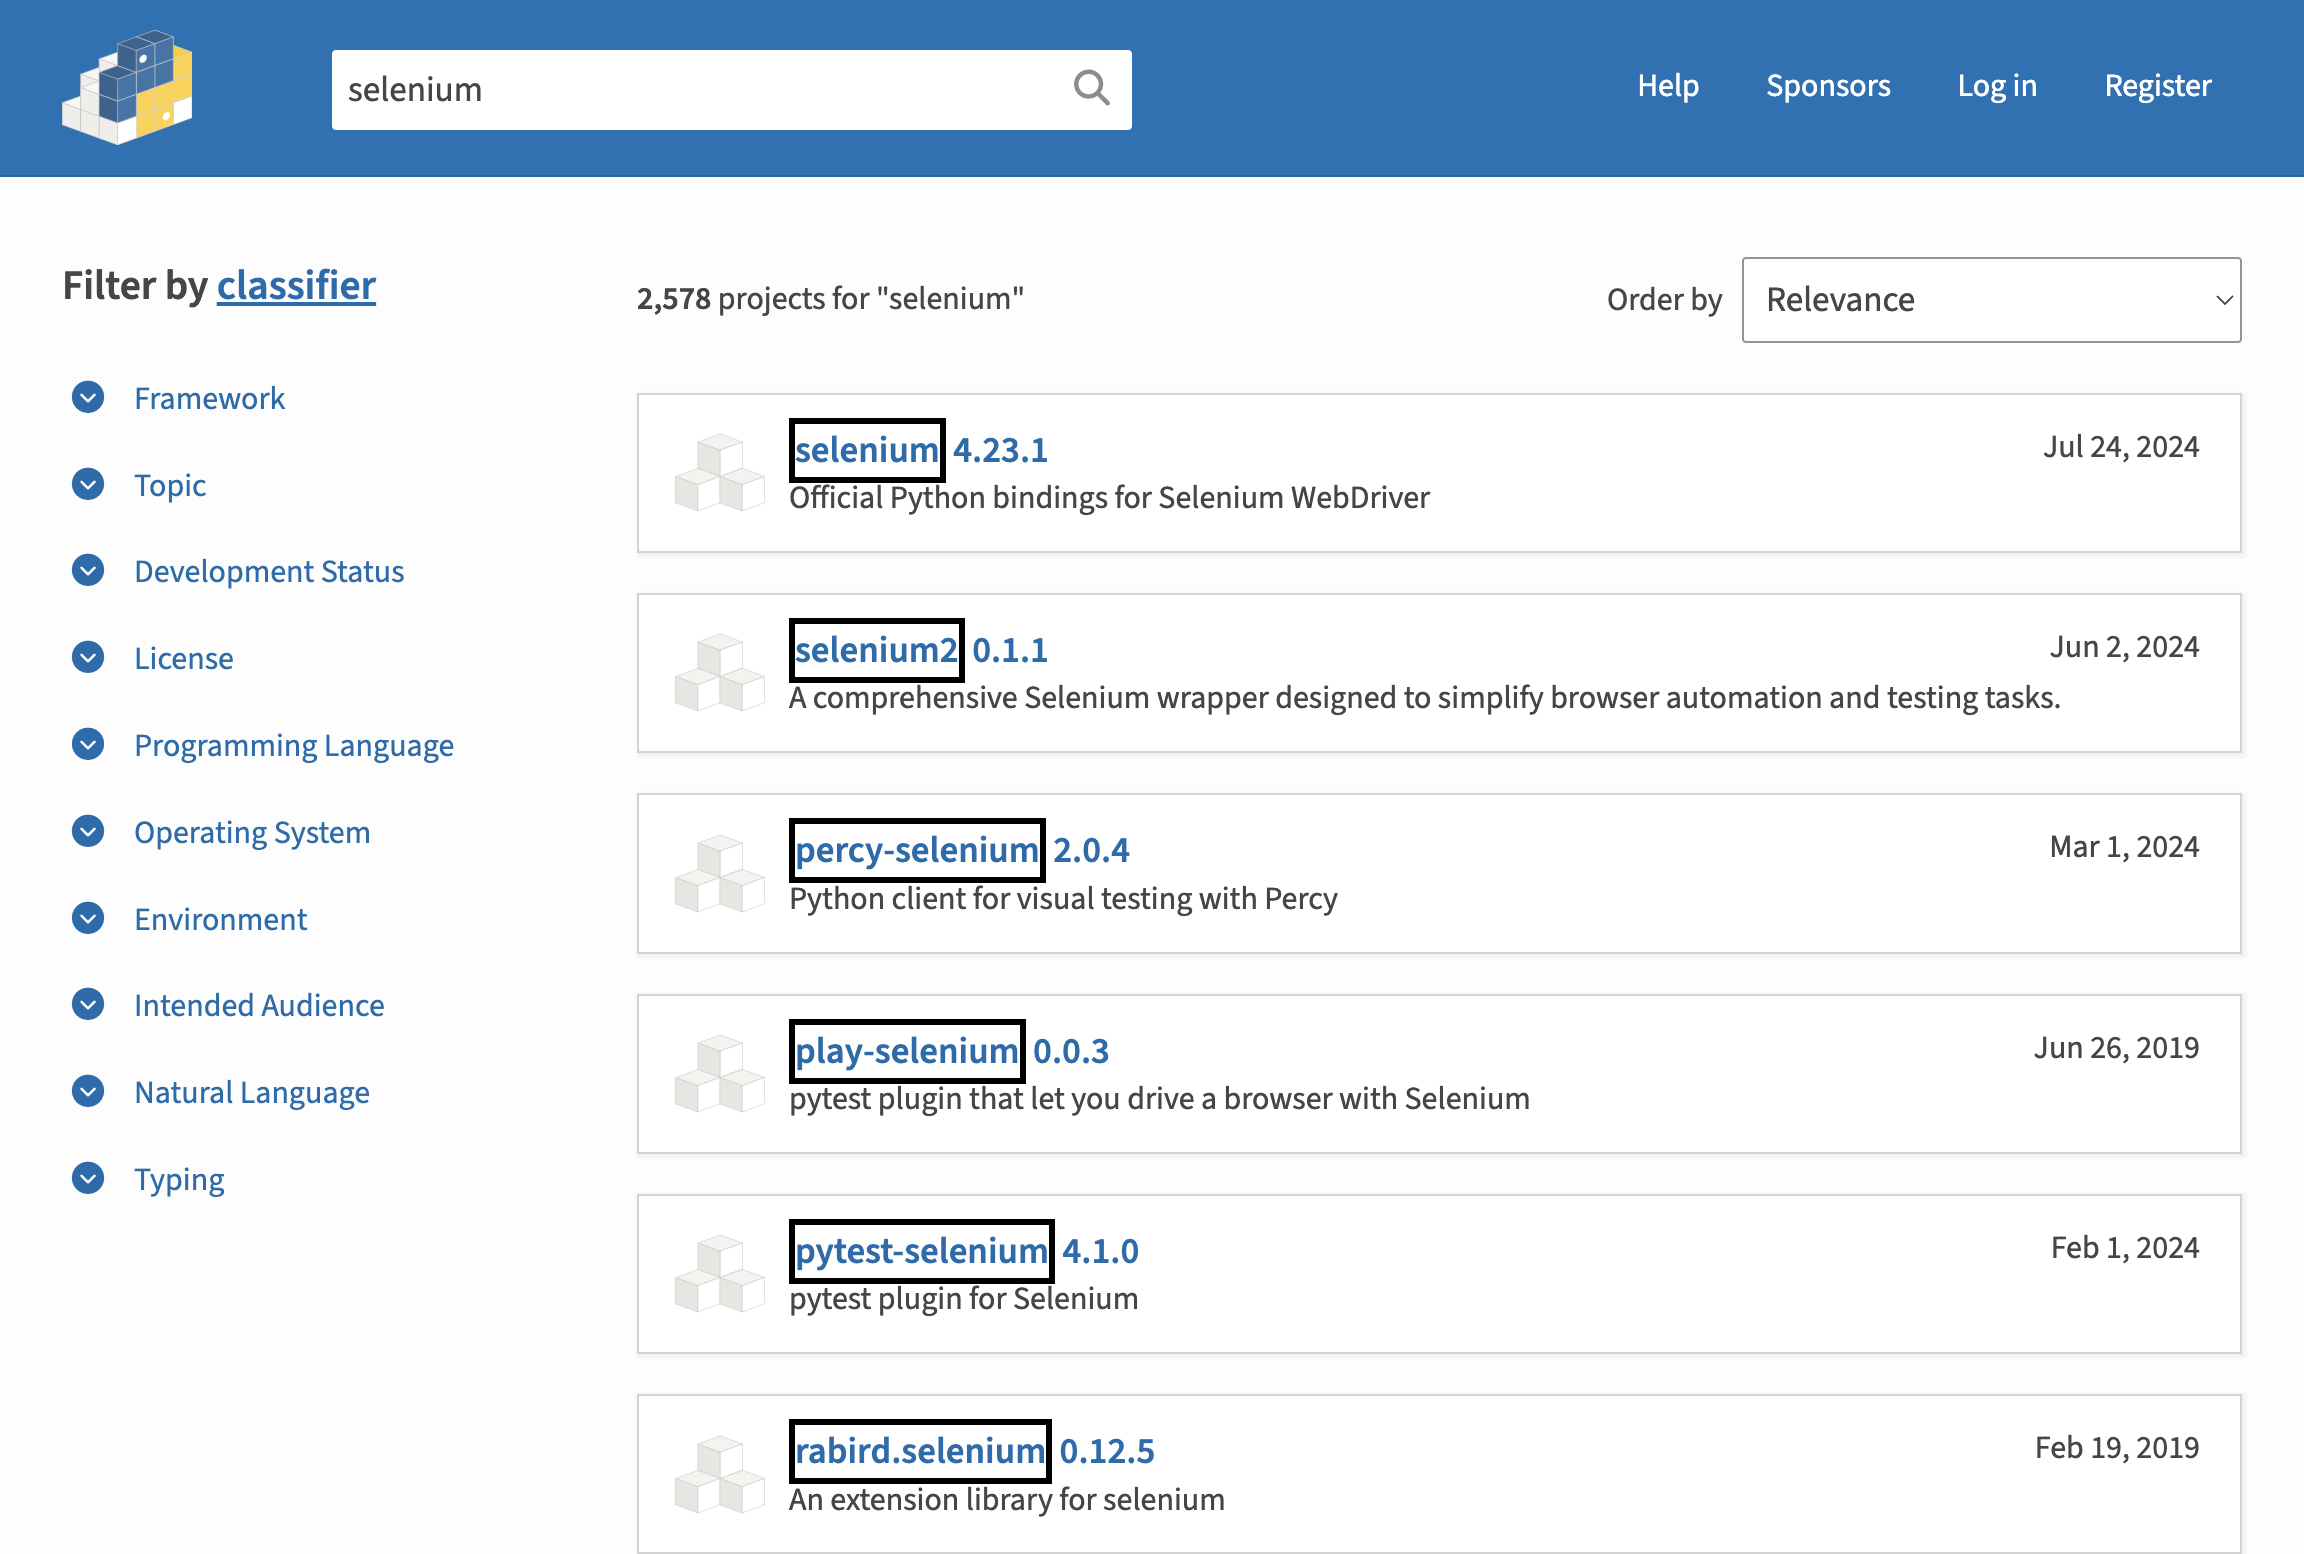

In [10]:
from tempfile import NamedTemporaryFile
from IPython.display import Image

# Find all the package names in the search results, and highlight them
browser.highlight("ul[aria-label='Search results']>li>a>h3>span.package-snippet__name")

# Visualize the results with a screenshot
with NamedTemporaryFile(suffix='.png') as f:
    browser.save_screenshot(f.name)
    highlight_screenshot = Image(f.name)

highlight_screenshot

## Cookies management

The browser in Manen also provides a simple interface for cookie management. With a `selenium.WebDriver`, you will have to use the methods `get_cookies`, `add_cookie` and `delete_all_cookies`, but with a `Browser`, you can interact with cookies through the `cookies` property.

In [11]:
# Go to a site that setup a cookie named 'test', with the value 'manen'
browser.get("https://httpbin.org/cookies/set/test/manen")

In [12]:
browser.cookies

[{'domain': 'httpbin.org',
  'httpOnly': False,
  'name': 'test',
  'path': '/',
  'sameSite': 'Lax',
  'secure': False,
  'value': 'manen'}]

In [13]:
browser.cookies += [{'name': 'foo', 'value': 'bar'}]

In [14]:
len(browser.cookies)

2

In [15]:
del browser.cookies
assert len(browser.get_cookies()) == 0

---

That's it for the `Browser` exploration!

Don't hesitate to open an issue if you have any improvement suggestions, feedbacks, or bugs!

In [16]:
browser.quit()